In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import math
import os
from dateutil.relativedelta import relativedelta
from sklearn.cluster import KMeans
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_tree
# Logistic Regresison 
import statsmodels
from  statsmodels.discrete.discrete_model import Logit
import sklearn
from sklearn.linear_model import LogisticRegression

In [2]:
# This is used to block warning messages
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
# Or ignore specific warnings by category (e.g., FutureWarnings)
warnings.filterwarnings("ignore", category=FutureWarning)
# This is used to edit image
from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
data_on_customer_churn = pd.read_csv(r'C:\Users\Admin\RBAC\Churn_Rate_Each_Customer.csv',index_col=0)

# 1 | Using Feature Importance

## 1.1 | Adjust feature

In [4]:
data_on_customer_churn2 = data_on_customer_churn.copy()
data_on_customer_churn2['percen_Channel_Delivery'] = data_on_customer_churn2['Channel_Delivery'] / data_on_customer_churn2['CountOrder']
data_on_customer_churn2['percen_Channel_DineIn'] = data_on_customer_churn2['Channel_DineIn'] / data_on_customer_churn2['CountOrder']
data_on_customer_churn2['percen_Channel_TakeAway'] = data_on_customer_churn2['Channel_TakeAway'] / data_on_customer_churn2['CountOrder']
data_on_customer_churn2['percen_OrderFrom_Store'] = data_on_customer_churn2['OrderFrom_Store'] / data_on_customer_churn2['CountOrder']
data_on_customer_churn2['percen_OrderFrom_Web'] = data_on_customer_churn2['OrderFrom_Web'] / data_on_customer_churn2['CountOrder']
data_on_customer_churn2['percen_OrderFrom_CallCenter'] = data_on_customer_churn2['OrderFrom_CallCenter'] / data_on_customer_churn2['CountOrder']
data_on_customer_churn2['percen_OrderFrom_App'] = data_on_customer_churn2['OrderFrom_App'] / data_on_customer_churn2['CountOrder']

# 1.2 | Analyzing

In [5]:
data_on_customer_churn =  data_on_customer_churn2

In [6]:
x_train = data_on_customer_churn.drop(columns=['Active','Year_Month','CustomerGender_Unknown','CustomerID'])
y_train = data_on_customer_churn['Active']

In [7]:
model_xgb = XGBClassifier()

In [8]:
model_xgb.fit(x_train, y_train, verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
Feature_importance = pd.DataFrame({
    'Feature':x_train.columns,
    'Importance':list(model_xgb.feature_importances_)
}).sort_values('Importance',ascending=False)

In [10]:
Feature_importance

,Feature,Importance
1,CountOrder,0.679423
12,CustomerGender_Male,0.098141
11,CustomerGender_Female,0.070921
10,Cur_LifeTime,0.041554
7,OrderFrom_CallCenter,0.012785
5,OrderFrom_Store,0.007946
8,OrderFrom_App,0.007649
2,Channel_Delivery,0.007019
6,OrderFrom_Web,0.006558
3,Channel_TakeAway,0.005776


<BarContainer object of 24 artists>

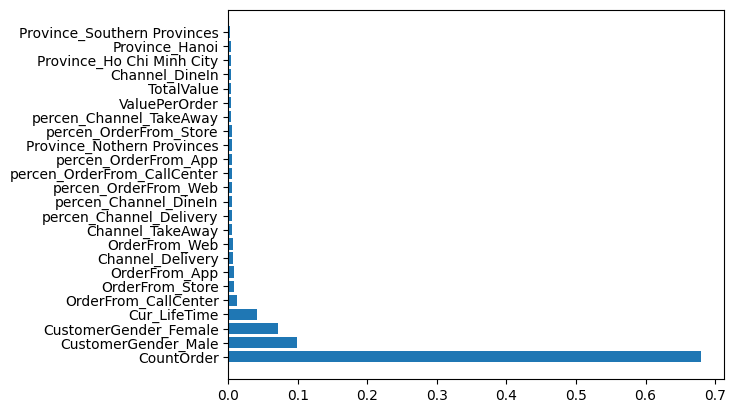

In [11]:
fig, ax = plt.subplots()
ax.barh(
    y=Feature_importance['Feature'],
    width=Feature_importance['Importance']
)

# 2 | Using Logistic Regression

In [12]:
def logit_ratio(df):
    dict = {}
    for var in df.drop(columns = ['Active']):
        data = df[[var,'Active']].dropna()
        # get x, y
        x = data[var].values
        y = data['Active'].values
        # # standardize 
        # x = (x - x.mean()) / (x.std())
        x = np.expand_dims(x,axis=-1)
        # fit the model
        model = LogisticRegression().fit(x,y)
        coeff = model.coef_
        coeff = np.squeeze(coeff,axis=1)
        dict[var] = coeff
        # gen result df
        res_df = pd.DataFrame(dict).T.rename(columns={0: "Coefficient"})
        res_df['Absolute_val'] = res_df.apply(lambda x: np.abs(x))
        res_df = res_df.sort_values('Absolute_val',ascending=False)
    return res_df

In [13]:
data_on_customer_churn.columns

Index(['TotalValue', 'CountOrder', 'Channel_Delivery', 'Channel_TakeAway',
       'Channel_DineIn', 'OrderFrom_Store', 'OrderFrom_Web',
       'OrderFrom_CallCenter', 'OrderFrom_App', 'CustomerID', 'Year_Month',
       'Active', 'ValuePerOrder', 'Cur_LifeTime', 'CustomerGender_Female',
       'CustomerGender_Male', 'CustomerGender_Unknown', 'Province_Hanoi',
       'Province_Ho Chi Minh City', 'Province_Nothern Provinces',
       'Province_Southern Provinces', 'percen_Channel_Delivery',
       'percen_Channel_DineIn', 'percen_Channel_TakeAway',
       'percen_OrderFrom_Store', 'percen_OrderFrom_Web',
       'percen_OrderFrom_CallCenter', 'percen_OrderFrom_App'],
      dtype='object')

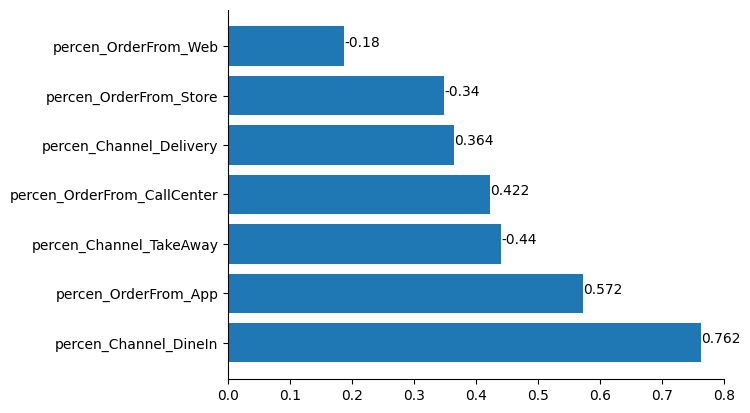

In [14]:
cate_var = ['CustomerGender_Female','CustomerGender_Male', 
            'Province_Hanoi','Province_Ho Chi Minh City', 'Province_Nothern Provinces',
            'Province_Southern Provinces']
drop_col = ['OrderFrom_Store','CountOrder','ValuePerOrder', 'Cur_LifeTime','Channel_TakeAway','TotalValue','Channel_Delivery','OrderFrom_App','OrderFrom_CallCenter','Channel_DineIn','OrderFrom_Web','CustomerID','Year_Month','CustomerGender_Unknown']
nume_var = data_on_customer_churn.columns[data_on_customer_churn.columns.isin(cate_var)==0].drop(drop_col)
coef_tab_num = logit_ratio(data_on_customer_churn[nume_var])
##### 
fig, ax = plt.subplots()
ax.barh(
    y=coef_tab_num.index,
    width=coef_tab_num.Absolute_val
)
for i,val in coef_tab_num.iterrows():
    ax.annotate(
        str(val['Coefficient'])[:5],
        xy=(val['Absolute_val'],i)
    )
sns.despine()

In [16]:
coef_tab_num.to_excel(r'LogisticRegg_per.xlsx')

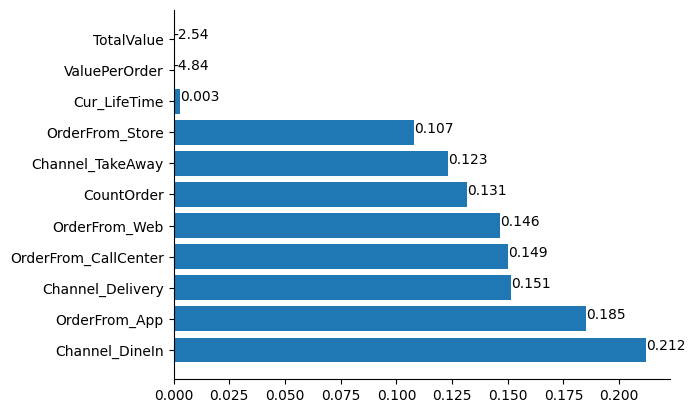

In [72]:
cate_var = ['CustomerGender_Female','CustomerGender_Male', 
            'Province_Hanoi','Province_Ho Chi Minh City', 'Province_Nothern Provinces',
            'Province_Southern Provinces']

abs_num = ['Active','OrderFrom_Store','CountOrder','ValuePerOrder', 'Cur_LifeTime','Channel_TakeAway','TotalValue','Channel_Delivery','OrderFrom_App','OrderFrom_CallCenter','Channel_DineIn','OrderFrom_Web']
nume_var = data_on_customer_churn.columns[data_on_customer_churn.columns.isin(cate_var)==0].drop(drop_col)



coef_tab_num = logit_ratio(data_on_customer_churn[abs_num])
##### 
fig, ax = plt.subplots()
ax.barh(
    y=coef_tab_num.index,
    width=coef_tab_num.Absolute_val
)
for i,val in coef_tab_num.iterrows():
    ax.annotate(
        str(val['Coefficient'])[:5],
        xy=(val['Absolute_val'],i)
    )
sns.despine()

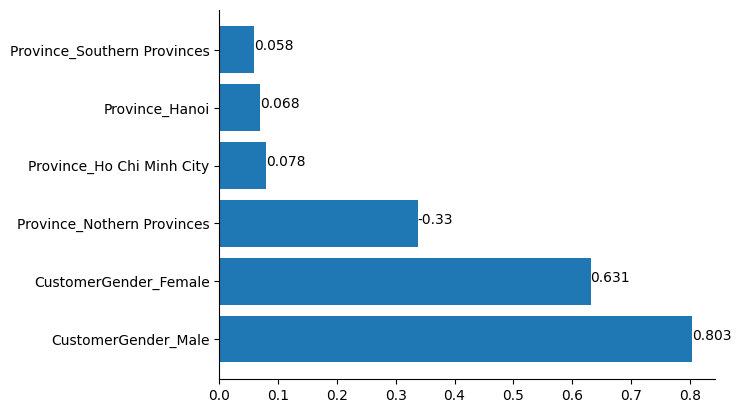

In [62]:
coef_tab_cate = logit_ratio(data_on_customer_churn[cate_var + ['Active']])

fig, ax = plt.subplots()
ax.barh(
    y=coef_tab_cate.index,
    width=coef_tab_cate.Absolute_val
)
for i,val in coef_tab_cate.iterrows():
    ax.annotate(
        str(val['Coefficient'])[:5],
        xy=(val['Absolute_val'],i)
    )
sns.despine()

In [19]:
def calculate_percentage_change(coef, increase=1):
    def cal_linear(x):
        return np.exp(coef*x)
    def cal_per(x):
        return cal_linear(x)/ (1+ cal_linear(x))
    x1 = cal_per(1)
    x2 = cal_per(1+ increase) 
    percen_change_PER = (x2-x1)*100/x1
    percen_change_ABS = x2-x1
    return percen_change_PER, percen_change_ABS

In [24]:
calculate_percentage_change(coef = 0.212, increase = 0.5)

(4.709526385203945, 0.026034374200554655)